In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
allProductDf = pd.read_csv('./allProduct.csv')

In [4]:
df=pd.DataFrame() 

In [5]:
allProductDf.head()

,Unnamed: 0,order_id,product_id,order_status,review_score,price,freight_value,review_comment_title,review_comment_message,product_category_name_english
0,0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,delivered,5,58.9,13.29,NaN,"Perfeito, produto entregue antes do combinado.",cool_stuff
1,1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,delivered,5,55.9,17.96,NaN,"lannister como sempre, entregou certinho e den...",cool_stuff
2,2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,delivered,4,64.9,18.33,super recomendo,carrinho muito bonito,cool_stuff
3,3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,delivered,5,58.9,16.17,NaN,NaN,cool_stuff
4,4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,delivered,5,58.9,13.29,NaN,NaN,cool_stuff


In [6]:
allProductDf.order_status.value_counts()

delivered      109281
shipped          1169
canceled          530
invoiced          352
processing        344
unavailable         7
approved            3
Name: order_status, dtype: int64

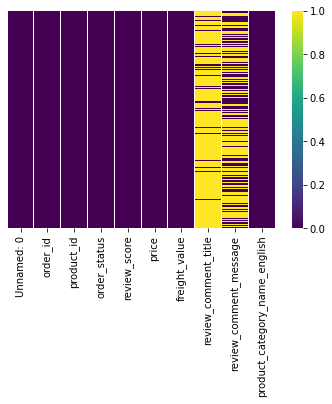

In [7]:
sns.heatmap(allProductDf.isnull(),yticklabels=False,cmap='viridis')

# NaN values available only in review comment title and in review comment message  

In [11]:
 from sklearn import preprocessing

In [12]:
label_encoder = preprocessing.LabelEncoder()  
allProductDf['encodedCategory']= label_encoder.fit_transform(allProductDf['product_category_name_english'])

In [13]:
allProductDf['TargetVar']=allProductDf.order_status.apply(lambda x: 1 if x in ['delivered','invoiced'] else 0)

 

In [14]:
allProductDf.TargetVar.unique()

array([1, 0], dtype=int64)

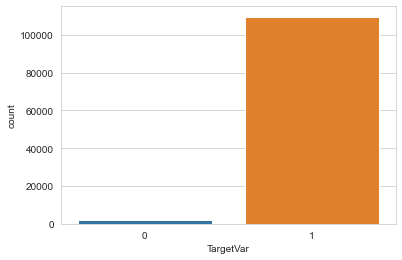

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='TargetVar',data=allProductDf)

# The dataset is imbalanced as the count of delived items is very high as compared to not delivered

In [16]:

allProductDf['Total_Price'] = allProductDf.price.astype(int) + allProductDf.freight_value.astype(int)


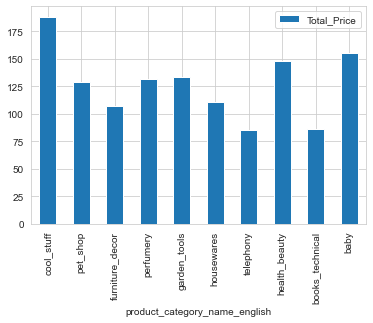

In [17]:
allProductDf.groupby('product_category_name_english',sort=False)[['Total_Price']].mean()[:10].plot(kind="bar")


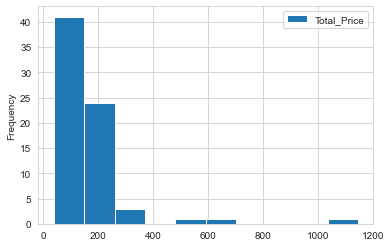

In [18]:
allProductDf.groupby('product_category_name_english',sort=False)[['Total_Price']].mean().plot(kind="hist",bins=10)

# Looking at bar graph it shows computer appliances has the highest price ,while histogram shows that maximim products has the price range of 0-100

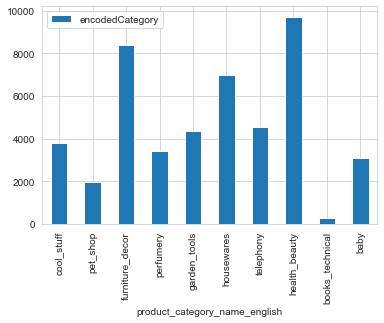

In [19]:
allProductDf.groupby('product_category_name_english',sort=False)[['encodedCategory']].count()[:10].plot(kind="bar")

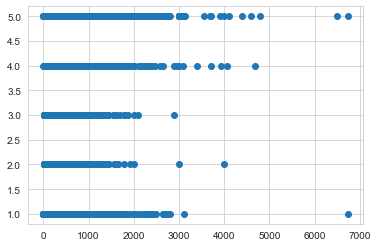

In [20]:
plt.scatter(allProductDf.price,allProductDf.review_score)

In [21]:
categorywisePrice.head()

NameError: name 'categorywisePrice' is not defined

In [25]:
allProductDf=allProductDf.drop(['order_status'], axis=1)

KeyError: "['order_status'] not found in axis"

In [26]:
X=allProductDf.drop(['order_id','product_id','review_comment_title','review_comment_message','product_category_name_english','TargetVar'], axis=1).values

In [27]:
y=allProductDf['TargetVar'].values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import KFold,GridSearchCV

In [29]:
gnb = GaussianNB()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [31]:
 y_predGauss = gnb.fit(X_train, y_train).predict(X_test)

In [32]:
print(accuracy_score(y_test, y_predGauss))
#accuracy_score(y_test, y_pred, normalize=False)
print(confusion_matrix(y_test, y_predGauss))

0.9630513937802184
[[   31   590]
 [  648 32237]]


In [33]:
#allProductDf.product_category_name_english.unique()

In [34]:
#print(allProductDf.loc[allProductDf['product_category_name_english'] =='costruction_tools_tools' ],'TargetVar')

In [35]:
c.TargetVar.value_counts()

1    109633
0      2053
Name: TargetVar, dtype: int64

In [36]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# Dataset is imbalanced as for the majority class of producy delivered on invoiced
#the optimization metrics shows very high value but for the other category the model
#performance is very bad.

In [ ]:
#performing logistic regression with Kfold classification and hyperparameter tuning

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logReg=LogisticRegression()

In [45]:
grid={'C':10.0**np.arange(-2,3),'penalty':['l2']}

In [46]:
cv=KFold(n_splits=2,shuffle=False,random_state=None)

In [47]:
clf=GridSearchCV(logReg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

C:\Users\shiva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       621
           1       0.98      1.00      0.99     32885

    accuracy                           0.98     33506
   macro avg       0.49      0.50      0.50     33506
weighted avg       0.96      0.98      0.97     33506

[[    0   621]
 [    6 32879]]
0.9812869336835194


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.16      0.26       621
           1       0.98      1.00      0.99     32885

    accuracy                           0.98     33506
   macro avg       0.83      0.58      0.62     33506
weighted avg       0.98      0.98      0.98     33506

[[   99   522]
 [   48 32837]]
0.9829881215304721


In [58]:
from sklearn.inspection import permutation_importance

Feature ranking:
1. feature 0 (0.283430)
2. feature 3 (0.196776)
3. feature 2 (0.181219)
4. feature 5 (0.165166)
5. feature 4 (0.103257)
6. feature 1 (0.070152)


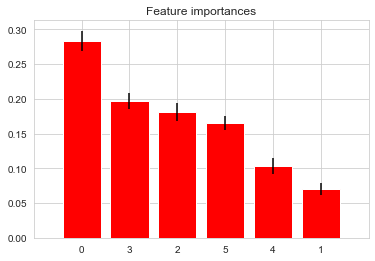

In [56]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [57]:
allProductDf.head()

,Unnamed: 0,order_id,product_id,review_score,price,freight_value,review_comment_title,review_comment_message,product_category_name_english,encodedCategory,TargetVar,Total_Price
0,0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,5,58.9,13.29,NaN,"Perfeito, produto entregue antes do combinado.",cool_stuff,20,1,71
1,1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,5,55.9,17.96,NaN,"lannister como sempre, entregou certinho e den...",cool_stuff,20,1,72
2,2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,4,64.9,18.33,super recomendo,carrinho muito bonito,cool_stuff,20,1,82
3,3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,5,58.9,16.17,NaN,NaN,cool_stuff,20,1,74
4,4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,5,58.9,13.29,NaN,NaN,cool_stuff,20,1,71
